<a href="https://colab.research.google.com/github/Rajan-sust/ML/blob/master/DataScience01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Python Numerical stack and EDA

# Table of Contents 

- Learning Goals
- Introduction to Numpy
- Introduction to Pandas
- Beginning Exploratory Data Analysis (EDA)


## Part 0: Learning Goals 
We load a dataset first as a numpy array and then as a pandas dataframe, and begin exploratory data analysis (EDA). 
By the end of this lab, you will be able to:
- Create and manipulate one-dimensional and two-dimensional numpy arrays, and pandas series and dataframes.
- Describe how to index and "type" Pandas Series and Dataframes.
- Create histograms and scatter plots for basic exploratory data analysis

In [0]:
# To draw things on the notebook instead of a separate window
%matplotlib inline 
# Import necessary libraries
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm # allows us easy access to colormaps
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
# sets up pandas table display
#pd.set_option('display.width', 500)
#pd.set_option('display.max_columns', 100)
#pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

## Part 1: Introduction to Numpy
Scientific Python code uses a fast array structure - the numpy array(0-indexed) which is listy! We can compute length, slice, and iterate. 

In [3]:
my_array = np.array([1, 2, 3, 4]) #create
my_array             # display
print(len(my_array)) # length
print(my_array[2:4]) # slice
for ele in my_array: # loop
    print(ele)
print(my_array.mean()) # calcuate mean by method call
print(np.mean(my_array)) # calculate mean using numpy 
np.ones(10) # generates 10 floating point ones
np.ones(10, dtype='int') # generates 10 integer ones
np.zeros(10)
np.random.random(10) # uniform on [0,1]
# generate random numbers from a normal distribution with mean 0 and variance 1
normal_array = np.random.randn(1000)
print("The sample mean = %f standard devation = %f" %(np.mean(normal_array), np.std(normal_array)))
#numpy supports vector operations 
first = np.ones(5)
second = np.ones(5)
first + second
first + 1
first*5
# if you wanted the distribution N(5,7) you could do:
normal_5_7 = 5 + 7*normal_array
np.mean(normal_5_7), np.std(normal_5_7)

ones_2d = np.ones([3, 4]) # 3 x 4 array of ones
ones_2d.shape # show size
ones_2d.T # trasnpose
np.sum(normal_5_7) # sum all elements

4
[3 4]
1
2
3
4
2.5
2.5
The sample mean = 0.003113 standard devation = 0.989462


5021.791175377724

## Part 2:  Introduction to Pandas 

Often data is stored in comma separated values (CSV) files. CSV files can be output by any spreadsheet software, and are plain text, hence are a great way to share data. 
### Importing data with numpy
Below we'll read in automobile data from a CSV file, storing the data in Python's memory first as a numpy array.  
**Read car_data_description first.**

In [6]:
path = 'https://raw.githubusercontent.com/Rajan-sust/ML/master/Dataset/mtcars.csv'
arrcars = np.genfromtxt(path, delimiter=',', skip_header=1, usecols=(1,2,3,4,5,6,7,8,9,10,11))
print(arrcars.shape)
print(arrcars[0:5]) # not very nice

(32, 11)
[[ 21.      6.    160.    110.      3.9     2.62   16.46    0.      1.
    4.      4.   ]
 [ 21.      6.    160.    110.      3.9     2.875  17.02    0.      1.
    4.      4.   ]
 [ 22.8     4.    108.     93.      3.85    2.32   18.61    1.      1.
    4.      1.   ]
 [ 21.4     6.    258.    110.      3.08    3.215  19.44    1.      0.
    3.      1.   ]
 [ 18.7     8.    360.    175.      3.15    3.44   17.02    0.      0.
    3.      2.   ]]


We need a data structure that can represent the columns in the data by their name, can easily store variables of different types, that stores column names, and that we can reference by column name as well as by indexed position and have built-in functions that we can use to manipulate it. 
Pandas is a package/library that does all of this!  The library is built on top of numpy.  There are two basic pandas objects, *series* and *dataframes*, which can be thought of as enhanced versions of 1D and 2D numpy arrays, respectively.  Pandas attempts to keep all the efficiencies that `numpy` gives us.
### Importing data with pandas
Now let's read in our automobile data as a pandas *dataframe* structure. And look into the first five rows of data.

In [9]:
# Read in the csv files
data = pd.read_csv(path)
type(data)

pandas.core.frame.DataFrame

In [10]:
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


What we have now is a spreadsheet with indexed rows and named columns, called a *dataframe* in pandas.  `data` is an *instance* of the pd.DataFrame *class*, created by calling the pd.read_csv and it has methods (functions) belonging to it. 
A pandas dataframe is a set of columns pasted together into a spreadsheet. The columns in pandas are called *series* objects.
Notice the poorly named first column: "Unnamed: 0". This happened because the first column does not have a name.    
"","mpg","cyl","disp","hp","drat","wt","qsec","vs","am","gear","carb"

In [11]:
#Lets clean that up by renaming it to 'name'
data = data.rename(columns={"Unnamed: 0": "name"})
data.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [12]:
data.columns

Index(['name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [13]:
data.shape

(32, 12)

In [15]:
#To access a *series* (column), you can use either dictionary syntax or instance-variable syntax.
data.mpg

0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64

In [14]:
#You can get a numpy array of values from the Pandas Series:
data.mpg.values

array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
       16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
       15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4])

In [16]:
data['name']

0               Mazda RX4
1           Mazda RX4 Wag
2              Datsun 710
3          Hornet 4 Drive
4       Hornet Sportabout
5                 Valiant
6              Duster 360
7               Merc 240D
8                Merc 230
9                Merc 280
10              Merc 280C
11             Merc 450SE
12             Merc 450SL
13            Merc 450SLC
14     Cadillac Fleetwood
15    Lincoln Continental
16      Chrysler Imperial
17               Fiat 128
18            Honda Civic
19         Toyota Corolla
20          Toyota Corona
21       Dodge Challenger
22            AMC Javelin
23             Camaro Z28
24       Pontiac Firebird
25              Fiat X1-9
26          Porsche 914-2
27           Lotus Europa
28         Ford Pantera L
29           Ferrari Dino
30          Maserati Bora
31             Volvo 142E
Name: name, dtype: object

Text(0.5, 1.0, 'Miles per Gallon')

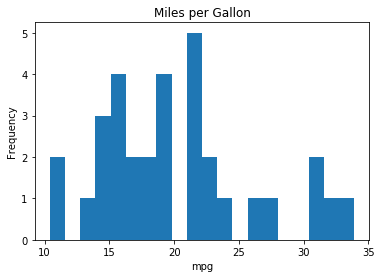

In [17]:
#And we can produce a histogram from these values
plt.hist(data.mpg.values, bins=20);
plt.xlabel("mpg");
plt.ylabel("Frequency")
plt.title("Miles per Gallon")

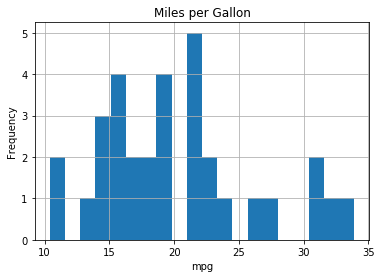

In [18]:
# you can get a histogram using panda
data.mpg.hist(bins=20);
plt.xlabel("mpg");
plt.ylabel("Frequency")
plt.title("Miles per Gallon");

In [19]:
#Pandas supports a dictionary like access to columns. 
data['mpg']

0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64

In [20]:
# We can also get sub-dataframes by choosing a set of series.  
data[['am', 'mpg']]

,am,mpg
0,1,21.0
1,1,21.0
2,1,22.8
3,0,21.4
4,0,18.7
5,0,18.1
6,0,14.3
7,0,24.4
8,0,22.8
9,0,19.2


### Dataframes and Series

Now that we have our automobile data loaded as a dataframe, we'd like to be able to manipulate it, its series, and its sub-dataframes, say by calculating statistics and plotting distributions of features.  Like arrays and other containers, dataframes and series are listy, so we can apply the list operations we already know to these new containers.  Below we explore our dataframe and its properties, in the context of listiness.

In [21]:
#Listiness property 1: set length
print(data.shape)     # 12 columns, each of length 32
print(len(data))      # the number of rows in the dataframe, also the length of a series
print(len(data.mpg))  # the length of a series

(32, 12)
32
32


In [22]:
#Listiness property 2: iteration via loops
# One consequence of the column-wise construction of dataframes is that you cannot easily iterate over the rows. 
# Instead, we iterate over the columns. 
for column in data: # iterating iterates over column names though, like a dictionary
    print(column)
    
# Or we can call the attribute `columns`.
data.columns

name
mpg
cyl
disp
hp
drat
wt
qsec
vs
am
gear
carb


Index(['name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [23]:
# We can iterate series in the same way that we iterate lists. 
# Here we print out the number of cylinders for each of the 32 vehicles. 
for element in data.cyl:
    print(element)
# you can iterate over rows by using `itertuples`.

6
6
4
6
8
6
8
4
4
6
6
8
8
8
8
8
8
4
4
4
4
8
8
8
8
4
4
4
8
6
8
4


In [24]:
#Listiness property 3: slice
print(list(data.index)) # index for the dataframe
data.cyl.index # index for the cyl series

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


RangeIndex(start=0, stop=32, step=1)

There are two ways to index dataframes. The `loc` property indexes by label name, while `iloc` indexes by position in the index.  

In [25]:
data.iloc[0:3]

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [26]:
data.loc[0:7]

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2


In [27]:
data.iloc[2:5, 1:4]

,mpg,cyl,disp
2,22.8,4,108.0
3,21.4,6,258.0
4,18.7,8,360.0


In [28]:
data.loc[7:9, ['mpg', 'cyl', 'disp']]

,mpg,cyl,disp
7,24.4,4,146.7
8,22.8,4,140.8
9,19.2,6,167.6


In [29]:
#add another column named 'maker' by parsing the first column
data['maker'] = data.name.apply(lambda x: x.split()[0])
data['maker']
#data.head()

0        Mazda
1        Mazda
2       Datsun
3       Hornet
4       Hornet
5      Valiant
6       Duster
7         Merc
8         Merc
9         Merc
10        Merc
11        Merc
12        Merc
13        Merc
14    Cadillac
15     Lincoln
16    Chrysler
17        Fiat
18       Honda
19      Toyota
20      Toyota
21       Dodge
22         AMC
23      Camaro
24     Pontiac
25        Fiat
26     Porsche
27       Lotus
28        Ford
29     Ferrari
30    Maserati
31       Volvo
Name: maker, dtype: object

**Let's make a toy dataframe from scratch.** 
- Create a series called `column_1` with entries 0, 1, 2, 3.
- Create a second series called `column_2` with entries 4, 5, 6, 7.
- Glue these series into a dataframe called `table`, where the first and second labelled column of the dataframe are `column_1` and `column_2`, respectively.  In the dataframe, `column_1` should be indexed as `col_1` and `column_2` should be indexed as `col_2`.
- Oops!  You've changed your mind about the index labels for the columns.  Use `rename` to rename `col_1` as `Col_1` and `col_2` as `Col_2`. 
- Rename `0` as `zero`, `1` as `one`, and so on.


In [30]:
column_1 = pd.Series(range(4))
column_2 = pd.Series(range(4,8))
table = pd.DataFrame({'col_1': column_1, 'col_2': column_2})
table = table.rename(columns={"col_1": "Col_1", "col_2":"Col_2"})
table
# try this
#table = table.rename({0: "zero", 1: "one", 2: "two", 3: "three"})
#table

,Col_1,Col_2
0,0,4
1,1,5
2,2,6
3,3,7


### Data Types

Columns in a dataframe (series) come with their own types. Some data may be categorical, boolean, or integer, floating-point, and `object`. The latter is a catch-all for a string or anything Pandas cannot infer, for example, a column that contains data of mixed types. 

In [31]:
data.dtypes

name      object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
maker     object
dtype: object

In [32]:
# Categorical 
data.maker.unique()

array(['Mazda', 'Datsun', 'Hornet', 'Valiant', 'Duster', 'Merc',
       'Cadillac', 'Lincoln', 'Chrysler', 'Fiat', 'Honda', 'Toyota',
       'Dodge', 'AMC', 'Camaro', 'Pontiac', 'Porsche', 'Lotus', 'Ford',
       'Ferrari', 'Maserati', 'Volvo'], dtype=object)

In [33]:
data.maker.describe()

count       32
unique      22
top       Merc
freq         7
Name: maker, dtype: object

In [34]:
av_mpg = data.groupby('maker').mpg.mean()
av_mpg

maker
AMC         15.200000
Cadillac    10.400000
Camaro      13.300000
Chrysler    14.700000
Datsun      22.800000
Dodge       15.500000
Duster      14.300000
Ferrari     19.700000
Fiat        29.850000
Ford        15.800000
Honda       30.400000
Hornet      20.050000
Lincoln     10.400000
Lotus       30.400000
Maserati    15.000000
Mazda       21.000000
Merc        19.014286
Pontiac     19.200000
Porsche     26.000000
Toyota      27.700000
Valiant     18.100000
Volvo       21.400000
Name: mpg, dtype: float64

In [35]:
#query
data.mpg < 100

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
Name: mpg, dtype: bool

In [36]:
data[data.mpg < 100].head() #try other queries

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,maker
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet


In [37]:
data.query("10 <= mpg <= 50").head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,maker
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet


In [38]:
data.sort_values(by="mpg").head(10)

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,maker
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4,Lincoln
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4,Cadillac
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4,Camaro
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,Duster
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4,Chrysler
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8,Maserati
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3,Merc
22,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2,AMC
21,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2,Dodge
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4,Ford


In [39]:
data[data.gear == 4]

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,maker
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,Merc
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,Merc
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,Merc
10,Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4,Merc
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,Fiat
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,Honda
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,Toyota


In [40]:
data.mpg.max()
# find sum, mean etc

33.9

In [41]:
data.groupby("maker").describe()

mpg                                     ... carb                      
         count       mean       std   min     25%  ...  min   25%  50%   75%  max
maker                                              ...                           
AMC        1.0  15.200000       NaN  15.2  15.200  ...  2.0  2.00  2.0  2.00  2.0
Cadillac   1.0  10.400000       NaN  10.4  10.400  ...  4.0  4.00  4.0  4.00  4.0
Camaro     1.0  13.300000       NaN  13.3  13.300  ...  4.0  4.00  4.0  4.00  4.0
Chrysler   1.0  14.700000       NaN  14.7  14.700  ...  4.0  4.00  4.0  4.00  4.0
Datsun     1.0  22.800000       NaN  22.8  22.800  ...  1.0  1.00  1.0  1.00  1.0
Dodge      1.0  15.500000       NaN  15.5  15.500  ...  2.0  2.00  2.0  2.00  2.0
Duster     1.0  14.300000       NaN  14.3  14.300  ...  4.0  4.00  4.0  4.00  4.0
Ferrari    1.0  19.700000       NaN  19.7  19.700  ...  6.0  6.00  6.0  6.00  6.0
Fiat       2.0  29.850000  3.606245  27.3  28.575  ...  1.0  1.00  1.0  1.00  1.0
Ford       1.0  15.800000       NaN  15.8  15.800  ...  4.0  4.00  4.0  4.00  4.0
Honda      1.0  30.400000       NaN  30.4  30.400  ...  2.0  2.00  2.0  2.00  2.0
Hornet     2.0  20.050000  1.909188  18.7  19.375  ...  1.0  1.25  1.5  1.75  2.0
Lincoln    1.0  10.400000       NaN  10.4  10.400  ...  4.0  4.00  4.0  4.00  4.0
Lotus      1.0  30.400000       NaN  30.4  30.400  ...  2.0  2.00  2.0  2.00  2.0
Maserati   1.0  15.000000       NaN  15.0  15.000  ...  8.0  8.00  8.0  8.00  8.0
Mazda      2.0  21.000000  0.000000  21.0  21.000  ...  4.0  4.00  4.0  4.00  4.0
Merc       7.0  19.014286  3.395305  15.2  16.850  ...  2.0  2.50  3.0  3.50  4.0
Pontiac    1.0  19.200000       NaN  19.2  19.200  ...  2.0  2.00  2.0  2.00  2.0
Porsche    1.0  26.000000       NaN  26.0  26.000  ...  2.0  2.00  2.0  2.00  2.0
Toyota     2.0  27.700000  8.768124  21.5  24.600  ...  1.0  1.00  1.0  1.00  1.0
Valiant    1.0  18.100000       NaN  18.1  18.100  ...  1.0  1.00  1.0  1.00  1.0
Volvo      1.0  21.400000       NaN  21.4  21.400  ...  2.0  2.00  2.0  2.00  2.0

[22 rows x 88 columns]

## Part 3:  Exploratory Data Analysis (EDA) - Global Properties

Below is a basic checklist for the early stages of exploratory data analysis in Python. While not universally applicable, the rubric covers patterns which recur in several data analysis contexts, so useful to keep it in mind when encountering a new dataset.
1. **Build** a DataFrame from the data (ideally, put all data in this object)
2. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed    
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms the data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to follow-up on in subsequent analysis.
So far we have **built** the dataframe from automobile data, and carried out very minimal **cleaning** (renaming) in this dataframe.  We'll now visualize global  properties of our dataset.  We illustrate the concepts using `mpg`. 
### Histograms
A histogram shows the frequency distribution of a dataset.  Below is the distribution of `mpg`.  

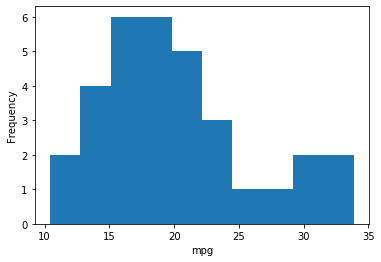

In [42]:
data.mpg.plot.hist()  
plt.xlabel("mpg");

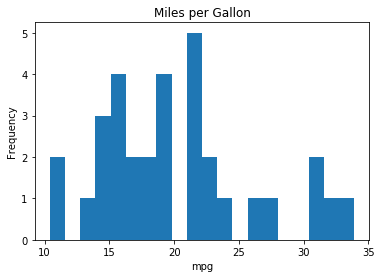

In [43]:
plt.hist(data.mpg, bins=20);
plt.xlabel("mpg");
plt.ylabel("Frequency")
plt.title("Miles per Gallon");

**EXERCISE**: Plot the distribution of the rear axle ratio (`drat`).  Label the axes accordingly and give the plot a title.    Calculate the mean of the distribution.

mean =  3.5965625000000006


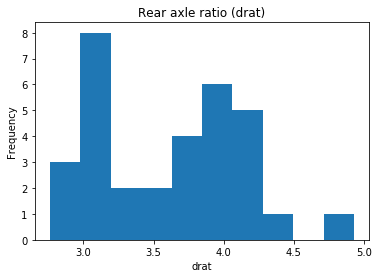

In [44]:
data.drat.plot.hist();
plt.xlabel("drat");
plt.ylabel("Frequency");
plt.title("Rear axle ratio (drat)");
print("mean = ", data.drat.mean())

### Scatter plots
We often want to see co-variation among our columns, for example, miles/gallon versus weight.  This can be done with a scatter plot. 

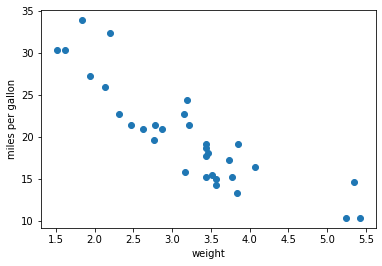

In [45]:
plt.scatter(data.wt, data.mpg); # you could also use plot and plot data as dots, try that.
plt.xlabel("weight");
plt.ylabel("miles per gallon"); # plt.show() if you run your Python program from a file. 
#plt.savefig('images/foo1.pdf')

Make a new dataframe with the columns of interest, sort it based on the x-value (`wt` in this case), and plot the sorted data.

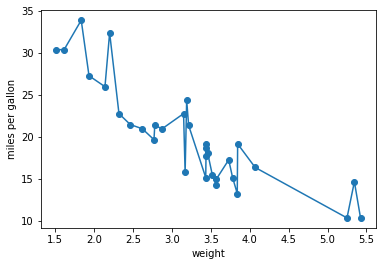

In [46]:
sub_data = data[['wt', 'mpg']]
data_temp = sub_data.sort_values('wt')
plt.plot(data_temp.wt, data_temp.mpg, 'o-');
plt.xlabel("weight");
plt.ylabel("miles per gallon"); #plt.show()

**EXERCISE**: Create a scatter plot showing the co-variation between two columns of your choice. Label the axes. Comment on the scatter plot. 

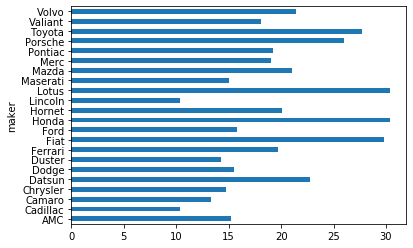

In [47]:
#bar chart
av_mpg.plot(kind="barh")

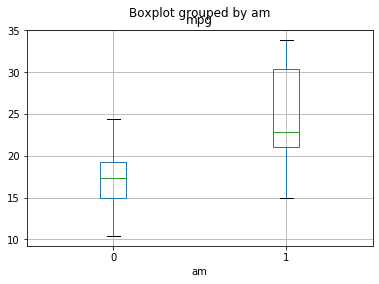

In [48]:
#box plot
data.boxplot(column = 'mpg', by = 'am')

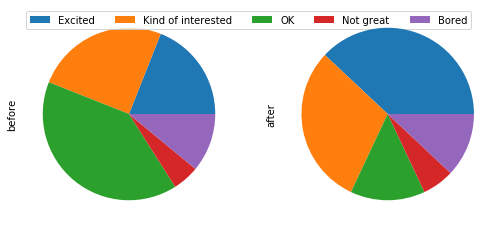

In [49]:
#pie chart
science = {
    'interest': ['Excited', 'Kind of interested', 'OK', 'Not great', 'Bored'],
    'before': [19, 25, 40, 5, 11],
    'after': [38, 30, 14, 6, 12]
}
dfscience = pd.DataFrame.from_dict(science).set_index("interest")[['before', 'after']]
fig, axs = plt.subplots(1,2, figsize = (8.5,4))
dfscience.before.plot(kind="pie", ax=axs[0], labels=None);
axs[0].legend(loc="upper left", ncol=5, labels=dfscience.index)
dfscience.after.plot(kind="pie", ax=axs[1], labels=None);